# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [2]:
url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

### Step 3. Assign it to a variable called drinks.

In [8]:
df_drinks=pd.read_csv(filepath_or_buffer=url)

In [9]:
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [22]:
df_drinks=df_drinks.sort_values(by='beer_servings',ascending=False)

In [68]:
df_drinks.fillna(value='NA',inplace=True)

In [91]:
df_drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF


In [69]:
df_drinks[df_drinks.country=='Spain']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
160,Spain,284,157,112,10.0,EU


Con ese filtro no tenemos la posición ordenada.
Tendremos que resetear el indice para ver la posición ordenada

In [70]:
df_drinks.reset_index().query('country =="Spain"')

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
12,160,Spain,284,157,112,10.0,EU


### Step 5. For each continent print the statistics for wine consumption.

In [93]:
df_g=df_drinks.groupby(by='continent')
df_g

####  Explicación del Profesor

In [71]:
df_drinks.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [72]:
df_g=df_drinks.groupby(by='continent')

In [73]:
import matplotlib.pyplot as plt

In [74]:
df_eu=df_g.get_group(name='EU')

In [75]:
df_g.get_group(name='EU')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,EU
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
135,Poland,343,215,56,10.9,EU
81,Ireland,313,118,165,11.4,EU
140,Romania,297,122,167,10.4,EU
16,Belgium,295,84,212,10.5,EU
160,Spain,284,157,112,10.0,EU
151,Serbia,283,131,127,9.6,EU
93,Latvia,281,216,62,10.5,EU


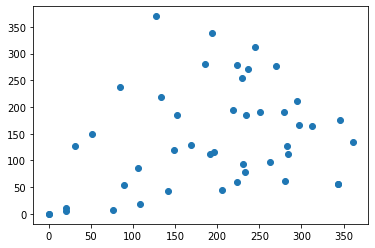

In [76]:
plt.scatter(x=df_eu.beer_servings,y=df_eu.wine_servings)

Text(50, 25, 'EEEHOOOO')

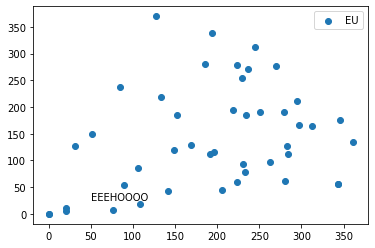

In [77]:
plt.scatter(x=df_eu.beer_servings,y=df_eu.wine_servings,label='EU')
plt.legend()
plt.text(x=50,y=25,s='EEEHOOOO')

In [78]:
import matplotlib.pyplot as plt

In [79]:
df_af=df_g.get_group(name='AF')

In [80]:
df_af

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
62,Gabon,347,98,59,8.9,AF
159,South Africa,225,76,81,8.2,AF
4,Angola,217,57,45,5.9,AF
22,Botswana,173,35,35,5.4,AF
152,Seychelles,157,25,51,4.1,AF
31,Cameroon,147,1,4,5.8,AF
29,Cabo Verde,144,56,16,4.0,AF
108,Mauritius,98,31,18,2.6,AF
55,Equatorial Guinea,92,0,233,5.8,AF


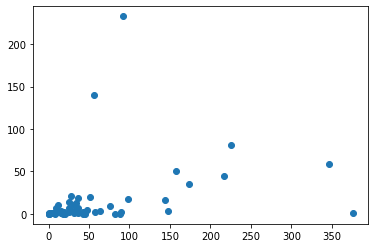

In [81]:
plt.scatter(x=df_af.beer_servings,y=df_af.wine_servings)

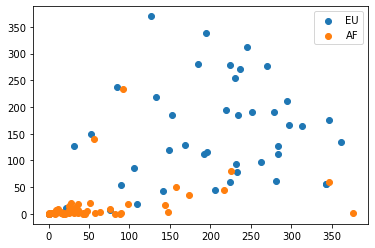

In [82]:
plt.scatter(x=df_eu.beer_servings,y=df_eu.wine_servings,label='EU')
plt.scatter(x=df_af.beer_servings,y=df_af.wine_servings,label='AF')
plt.legend()

Hacemos un bucle for para sacar todos los continentes

In [85]:
juanes=df_drinks.continent.unique()
juanes

array(['AF', 'EU', 'SA', 'OC', 'NA', 'AS'], dtype=object)

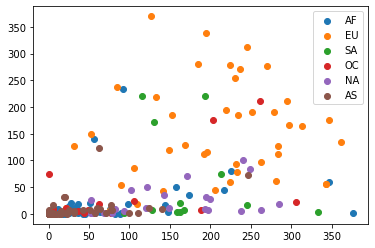

In [86]:
for juan in juanes:
    pepa= df_g.get_group(juan)

    plt.scatter(x=pepa.beer_servings,y=pepa.wine_servings,label=juan)
    plt.legend()

### Step 6. Print the mean alcohol consumption per continent for every column

In [102]:
df_drinks.groupby(by='continent').sum()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
NA,3345,3812,564,137.9
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [111]:
type(df_drinks.groupby(by='continent'))

pandas.core.groupby.generic.DataFrameGroupBy

### Step 7. Print the median alcohol consumption per continent for every column

In [99]:
df_drinks.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [113]:
df_drinks.agg(func=['mean','min','max'])['spirit_servings']

C:\Users\nettr\AppData\Local\Temp\ipykernel_11964\1363980358.py:1: FutureWarning: ['country', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_drinks.agg(func=['mean','min','max'])['spirit_servings']


mean     80.994819
min       0.000000
max     438.000000
Name: spirit_servings, dtype: float64